## Portfolio assignment 19
30 min: Create a cluster model on the penguins dataset.
- Use the pairplot() function on the penguins dataset. Do you visually notice any clusters? How many clusters do you think there are?
- Use the KMeans algorithm to create a cluster model. Apply this model to the dataset to create an extra column 'cluster' just like we did for the iris dataset above.  
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Calculate the Silhouette Coefficient for your clustering. Play around with the features and n_clusters to search for better results. Keep the cluster model with the highest Silhouette Coefficient.
- Use the pairplot(hue='cluster') function to observe how the model has clustered the data.
- We know the species of each penguin. Use a contingency table to reveal the relation between the cluster results and the species. Is there an exact match? Are there species which ended up in the same cluster? If so, what does it mean that they ended up in the same cluster?

In [23]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [17]:
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


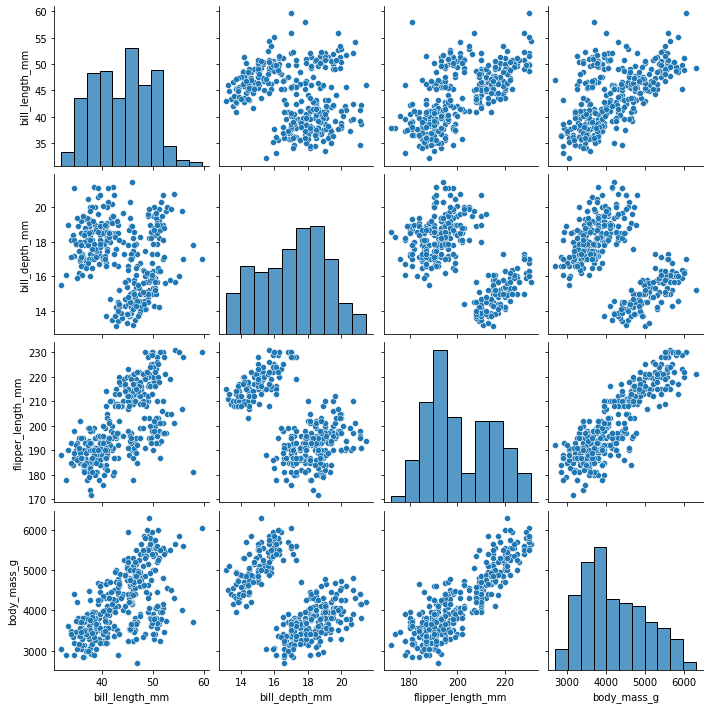

In [12]:
sns.pairplot(data=penguins)

In a lot of these plots you can see 2 clusters (for example bill_depth_mm,body_mass_g). However, some of them are too mixed to conclude they're a seperate cluster.

In [19]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

In [20]:
penguins['cluster'] = km.predict(penguins[features])
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1


In [21]:
penguins.cluster.value_counts()

1    203
0    130
Name: cluster, dtype: int64

In [24]:
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6307117469850305

Score is bound between [-1,1], which means this is a decent score.

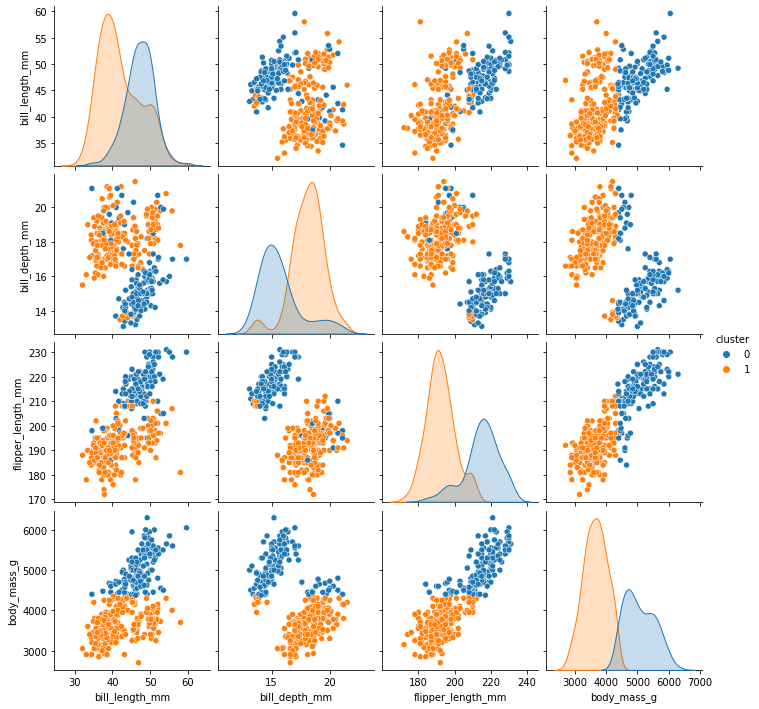

In [22]:
sns.pairplot(penguins, hue="cluster")

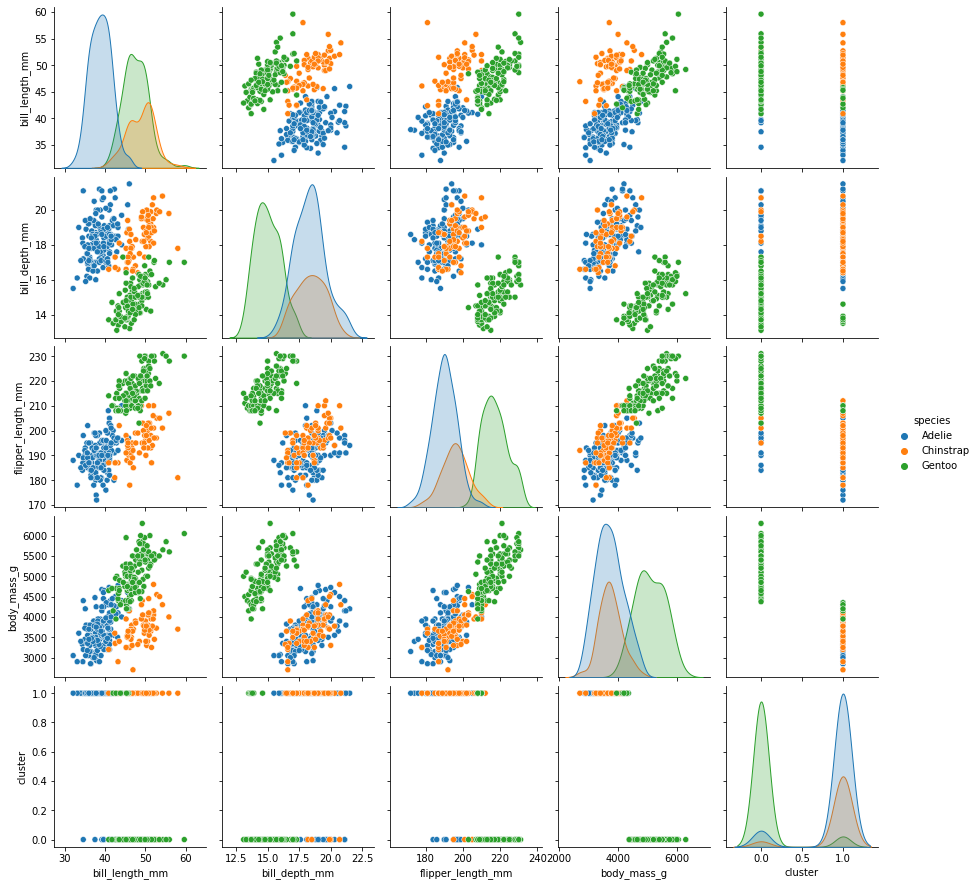

In [26]:
sns.pairplot(penguins, hue="species")

Just for fun :)

In [31]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,14,132
Chinstrap,5,63
Gentoo,111,8


None of the species got grouped into one single cluster, and no cluster has one specific species. This probably means that there are multiple factors that conclude a cluster.